In [49]:
# Imports
import numpy as np
import rcca
import matplotlib.pyplot as plt
# from brewer2mpl import qualitative
from palettable.colorbrewer import qualitative
%matplotlib inline
from mpl_toolkits import mplot3d


x = np.array([[1.,1.,3.],[2.,3.,2.],[1.,1.,1.],[1.,1.,2.],[2.,2.,3.],[3,3,2],[1,3,2],[4,3,5],[5,5,5]])
y = np.array([[4,4,-1.07846],[3,3,1.214359],[2,2,0.307180],[2,3,-0.385641],[2,1,-0.078461],[1,1,1.61436],[1,2,0.81436],[2,1,-0.06410],[1,2,1.54590]])
z = np.array([[1.,1.,3.],[2.,3.,2.],[1.,1.,1.],[2,3,-0.385641],[2,1,-0.078461],[1,1,1.61436],[1,2,0.81436],[2,1,-0.06410],[1,2,1.54590]])


In [16]:
x[0].shape[0]

3

In [7]:
y

array([[ 4.      ,  4.      , -1.07846 ],
       [ 3.      ,  3.      ,  1.214359],
       [ 2.      ,  2.      ,  0.30718 ],
       [ 2.      ,  3.      , -0.385641],
       [ 2.      ,  1.      , -0.078461],
       [ 1.      ,  1.      ,  1.61436 ],
       [ 1.      ,  2.      ,  0.81436 ],
       [ 2.      ,  1.      , -0.0641  ],
       [ 1.      ,  2.      ,  1.5459  ]])

In [57]:
testcca = rcca.CCA(kernelcca = False, reg = 0., numCC = 3)
testcca.train([x, y])

Training CCA, kernel = None, regularization = 0.0000, 3 components


In [51]:
testcca.ws

[array([[ 0.07626044,  0.07097611,  0.30779081],
        [-0.08708269, -0.18862853, -0.04259088],
        [-0.04708297,  0.11686183, -0.2068172 ]]),
 array([[-0.03803931,  0.23818889,  0.17811086],
        [-0.03660037, -0.20113329, -0.21625699],
        [-0.07280115, -0.07589162,  0.23327461]]),
 array([[-0.04531198,  0.29391925,  0.0923868 ],
        [-0.04185159, -0.24145923, -0.09423696],
        [-0.04861378,  0.01628386,  0.01983018]])]

In [52]:
testcca.comps

[array([[-0.15207116,  0.23293307, -0.35525167],
        [-0.20289314, -0.1902097 ,  0.07417459],
        [-0.05790522, -0.00079059,  0.05838273],
        [-0.10498819,  0.11607124, -0.14843447],
        [-0.16289342,  0.11528066, -0.09005174],
        [-0.1266327 , -0.11923358,  0.38196539],
        [-0.27915358, -0.26118581, -0.23361622],
        [-0.19162117,  0.30232801,  0.06930461],
        [-0.28952612, -0.00395293,  0.29191366]]),
 array([[-0.22004559,  0.23006845, -0.40416185],
        [-0.31232577,  0.01900712,  0.16884073],
        [-0.17164241,  0.0507988 , -0.00463496],
        [-0.15780462, -0.09775518, -0.3825095 ],
        [-0.10696693,  0.28119901,  0.12166177],
        [-0.19216694, -0.08546079,  0.33844306],
        [-0.17052639, -0.22588079, -0.06443361],
        [-0.10801243,  0.28010913,  0.12501183],
        [-0.22378335, -0.28139855,  0.1062161 ]]),
 array([[-0.23300492,  0.10131161,  0.05764038],
        [-0.3134063 , -0.10397145, -0.05827693],
        [-0.1357

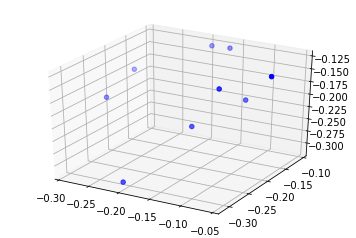

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(testcca.comps[0][:,0],testcca.comps[1][:,0],testcca.comps[2][:,0], c='b', cmap='Greens');

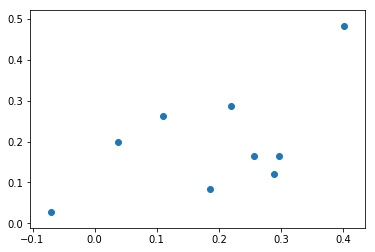

In [14]:
fig = plt.figure()
plt.scatter(testcca.comps[0][:,1],testcca.comps[1][:,1])

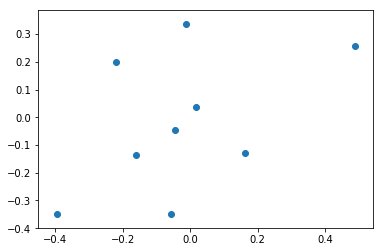

In [15]:
fig = plt.figure()
plt.scatter(testcca.comps[0][:,2],testcca.comps[1][:,2])

In [58]:
testcca.cancorrs

array([0.99999805, 0.57134344, 0.47134001])

In [29]:
kernel = [d.T for d in [x,y]]

In [30]:
len(kernel)


2

In [31]:
nFs = [k.shape[0] for k in kernel]

In [32]:
nFs

[3, 3]

In [33]:
numCC = min([k.shape[1] for k in kernel])

In [34]:
numCC

9

In [35]:
crosscovs = [np.dot(ki, kj.T) for ki in kernel for kj in kernel]


In [36]:
crosscovs

[array([[62., 62., 69.],
        [62., 68., 70.],
        [69., 70., 85.]]), array([[35.      , 36.      , 14.245415],
        [38.      , 42.      , 17.152594],
        [49.      , 50.      , 10.760293]]), array([[35.      , 38.      , 49.      ],
        [36.      , 42.      , 50.      ],
        [14.245415, 17.152594, 10.760293]]), array([[44.        , 44.        ,  2.861813  ],
        [44.        , 49.        ,  4.978993  ],
        [ 2.861813  ,  4.978993  ,  8.55023445]])]

In [37]:
nDs = len(kernel)

In [38]:
LH = np.zeros((sum(nFs), sum(nFs)))
RH = np.zeros((sum(nFs), sum(nFs)))

In [39]:
LH


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [42]:
for i in range(nDs):
        RH[sum(nFs[:i]) : sum(nFs[:i+1]),
           sum(nFs[:i]) : sum(nFs[:i+1])] = (crosscovs[i * (nDs + 1)] + 0 * np.eye(nFs[i]))

        for j in range(nDs):
            if i != j:
                LH[sum(nFs[:j]) : sum(nFs[:j+1]),
                   sum(nFs[:i]) : sum(nFs[:i+1])] = crosscovs[nDs * j + i]

In [43]:
RH


array([[62.        , 62.        , 69.        ,  0.        ,  0.        ,
         0.        ],
       [62.        , 68.        , 70.        ,  0.        ,  0.        ,
         0.        ],
       [69.        , 70.        , 85.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 44.        , 44.        ,
         2.861813  ],
       [ 0.        ,  0.        ,  0.        , 44.        , 49.        ,
         4.978993  ],
       [ 0.        ,  0.        ,  0.        ,  2.861813  ,  4.978993  ,
         8.55023445]])

In [45]:
LH = (LH + LH.T) / 2.
RH = (RH + RH.T) / 2.

In [47]:
RH

array([[62.        , 62.        , 69.        ,  0.        ,  0.        ,
         0.        ],
       [62.        , 68.        , 70.        ,  0.        ,  0.        ,
         0.        ],
       [69.        , 70.        , 85.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 44.        , 44.        ,
         2.861813  ],
       [ 0.        ,  0.        ,  0.        , 44.        , 49.        ,
         4.978993  ],
       [ 0.        ,  0.        ,  0.        ,  2.861813  ,  4.978993  ,
         8.55023445]])

In [48]:
maxCC = LH.shape[0]
maxCC - numCC

-3